In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display the plots
%matplotlib inline

# scikit learn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score, PrecisionRecallDisplay, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline

import scikitplot as skplt

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : True})

# To display maximum columns
pd.set_option('display.max_columns', 50)

# To display maximum rows
pd.set_option('display.max_rows', 50)

# To set float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

In [3]:
train.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.90,37.31,Etmiyor,obek_4,102.94
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.61,Küçük Şehir,Spor Malzemeleri,4145.73,11.55,Etmiyor,obek_5,82.18
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.73,Küçük Şehir,Giyim,9924.38,55.35,Ediyor,obek_8,141.66
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.84,Kırsal,Giyim,6417.78,15.42,Etmiyor,obek_3,17.10
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.63,Büyük Şehir,Giyim,7886.66,14.69,Etmiyor,obek_3,20.47


In [ ]:
sns.boxplot(x="Medeni Durum", y="Yıllık Ortalama Gelir", data=df)

In [4]:
test.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.93,Köy veya Kasaba,Giyim,5566.59,15.44,Etmiyor,19.65
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.24,Büyük Şehir,Spor Malzemeleri,6756.77,14.96,Etmiyor,19.68
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.87,Küçük Şehir,Giyim,4493.92,10.91,Etmiyor,46.90
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.91,Köy veya Kasaba,Kozmetik,42670.65,32.33,Etmiyor,48.08
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.71,Küçük Şehir,Giyim,5959.27,4.52,Etmiyor,12.75


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [6]:
train.drop(columns= "index", inplace=True)

In [7]:
train.shape

(5460, 13)

In [8]:
# descriptive statistics for numerical columns

train.describe().T.style.background_gradient(axis=1, cmap="Spectral")

,count,mean,std,min,25%,50%,75%,max
Yıllık Ortalama Gelir,5460.000000,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1192437.145258
Yıllık Ortalama Satın Alım Miktarı,5460.000000,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,48605.594415
Yıllık Ortalama Sipariş Verilen Ürün Adedi,5460.000000,24.040884,14.945655,0.000000,11.550502,20.095924,35.918161,64.616196
Yıllık Ortalama Sepete Atılan Ürün Adedi,5460.000000,73.445693,47.214184,3.977559,25.009168,82.485579,104.473291,242.308441


In [9]:
# descriptive statistics for categorical columns

train.describe(include="O").T

,count,unique,top,freq
Cinsiyet,5460,2,Erkek,2964
Yaş Grubu,5460,5,18-30,1841
Medeni Durum,5460,2,Evli,2834
Eğitim Düzeyi,5460,9,Lise Mezunu,1388
İstihdam Durumu,5460,4,Düzenli ve Ücretli Bir İşi Var,2768
Yaşadığı Şehir,5460,4,Büyük Şehir,1959
En Çok İlgilendiği Ürün Grubu,5460,5,Giyim,1487
Eğitime Devam Etme Durumu,5460,2,Etmiyor,4554
Öbek İsmi,5460,8,obek_4,720


In [10]:
train['Öbek İsmi'].value_counts()

Öbek İsmi
obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: count, dtype: int64

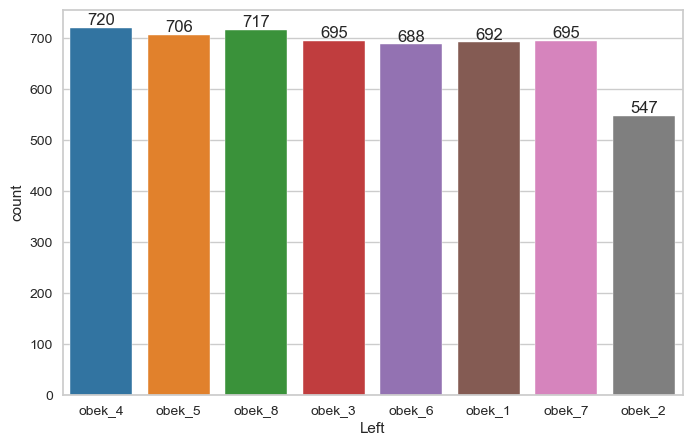

In [11]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'Öbek İsmi', data = train, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

In [12]:
train.groupby('Öbek İsmi')[['Yıllık Ortalama Gelir', 
                         'Yıllık Ortalama Satın Alım Miktarı',
                         'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
                         'Yıllık Ortalama Sepete Atılan Ürün Adedi']].mean()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
Öbek İsmi,,,,
obek_1,229513.85,6047.20,5.87,13.26
obek_2,172827.51,4996.04,20.67,50.99
obek_3,327899.09,7360.70,15.21,21.57
obek_4,817975.52,32405.01,38.89,98.03
obek_5,222224.04,4542.31,10.70,99.56
obek_6,480117.78,39440.27,29.78,50.68
obek_7,351949.98,26429.29,20.28,98.18
obek_8,255354.93,9277.24,49.09,146.42


In [13]:
train.nunique()

Cinsiyet                                         2
Yaş Grubu                                        5
Medeni Durum                                     2
Eğitim Düzeyi                                    9
İstihdam Durumu                                  4
Yıllık Ortalama Gelir                         5460
Yaşadığı Şehir                                   4
En Çok İlgilendiği Ürün Grubu                    5
Yıllık Ortalama Satın Alım Miktarı            5460
Yıllık Ortalama Sipariş Verilen Ürün Adedi    5422
Eğitime Devam Etme Durumu                        2
Öbek İsmi                                        8
Yıllık Ortalama Sepete Atılan Ürün Adedi      5460
dtype: int64

## Exploratory Data Analysis (EDA)

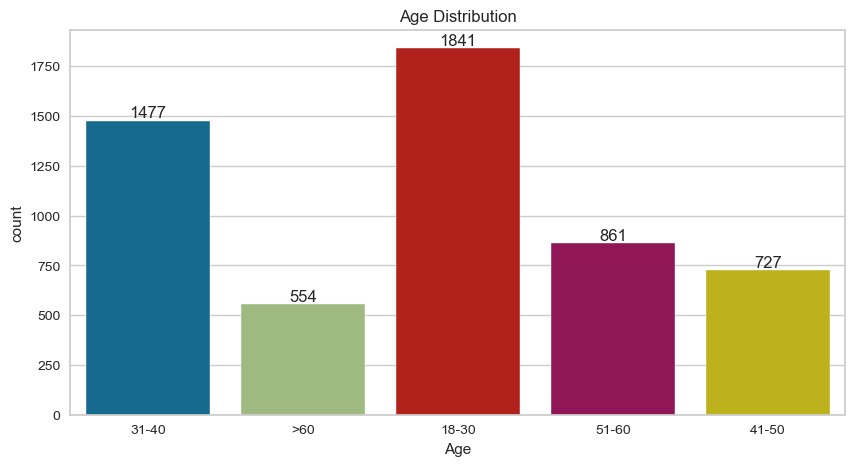

In [14]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x ='Yaş Grubu', data = train)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

# müşteri grubunun yaş aralığını araştırıyoruz.

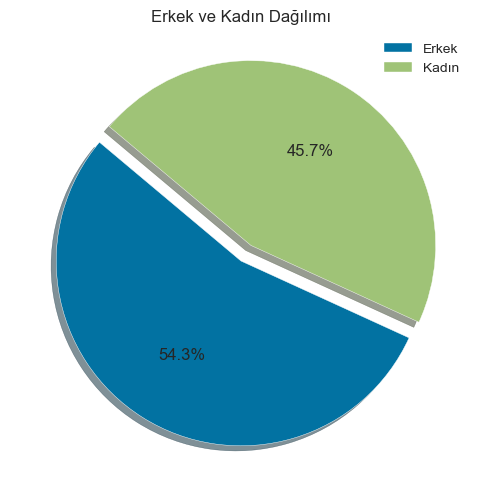

In [15]:
plt.figure(figsize=(6, 6))

explode = [0, 0.1]
plt.pie(train['Cinsiyet'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Erkek','Kadın'])
plt.title('Erkek ve Kadın Dağılımı')
plt.axis('off');

# customer segmantation'da önemli hususlardan biri olan cinsiyet oranlarını karşılaştırıyoruz.

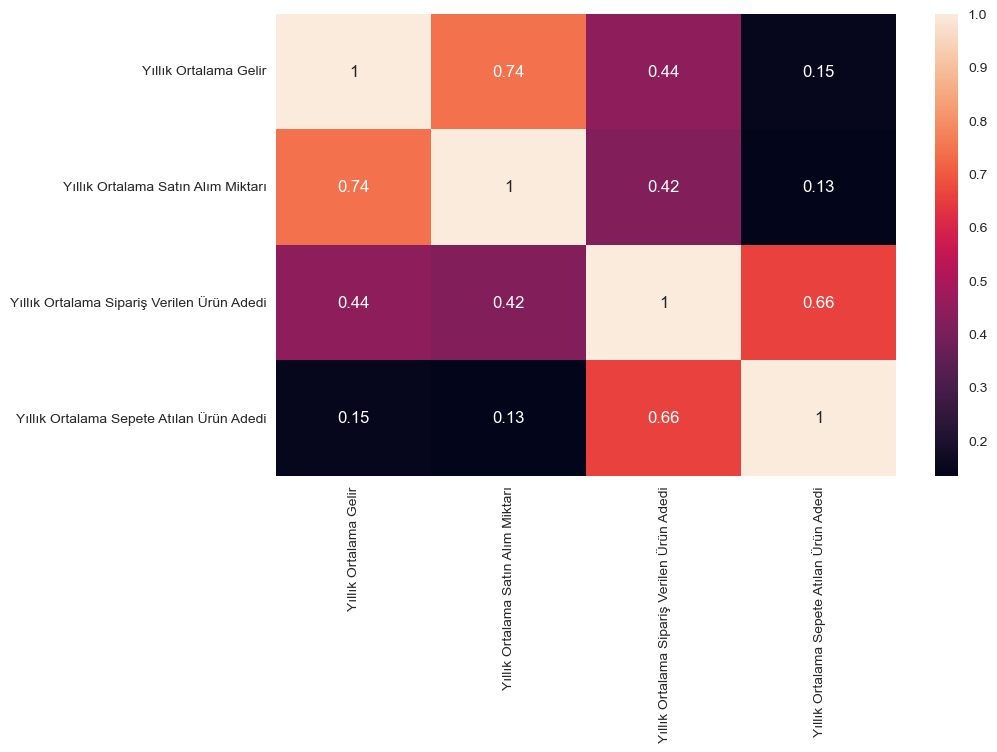

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True)
plt.show()

# feature'lar arası korelasyona bakıyoruz.

In [17]:
train.groupby('Cinsiyet')['Yıllık Ortalama Satın Alım Miktarı'].mean()

Cinsiyet
Erkek   15872.53
Kadın   17500.21
Name: Yıllık Ortalama Satın Alım Miktarı, dtype: float64

In [18]:
train.groupby('Cinsiyet')['Yıllık Ortalama Satın Alım Miktarı'].describe()

,count,mean,std,min,25%,50%,75%,max
Cinsiyet,,,,,,,,
Erkek,2964.00,15872.53,13775.57,3060.64,5334.94,7412.42,29153.19,48605.59
Kadın,2496.00,17500.21,14427.05,2859.25,4548.90,9018.62,31839.97,46812.44


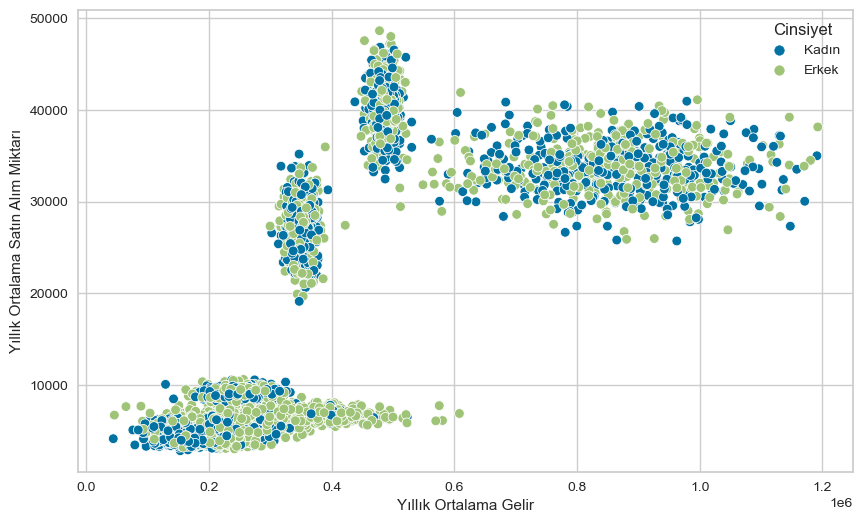

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='Yıllık Ortalama Gelir', y='Yıllık Ortalama Satın Alım Miktarı', data=train, hue = "Cinsiyet")
plt.show()

In [20]:
df = train.copy()

In [21]:
df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.44,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.90,37.31,Etmiyor,obek_4,102.94
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.61,Küçük Şehir,Spor Malzemeleri,4145.73,11.55,Etmiyor,obek_5,82.18
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.73,Küçük Şehir,Giyim,9924.38,55.35,Ediyor,obek_8,141.66
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.84,Kırsal,Giyim,6417.78,15.42,Etmiyor,obek_3,17.10
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.63,Büyük Şehir,Giyim,7886.66,14.69,Etmiyor,obek_3,20.47


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("Öbek İsmi", axis=1)
y = df["Öbek İsmi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Evaluation Functions for Models 

In [23]:
def eval_metric(model, X_train, y_train, X_test, y_test):   
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## **1-Logistic Regression** 

In [24]:
cat_onehot = ['Cinsiyet', 'Medeni Durum', 'İstihdam Durumu', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']
cat_ordinal = ['Yaş Grubu', 'Eğitim Düzeyi', 'Yaşadığı Şehir']

yaş = ['18-30', '31-40', '41-50', '51-60', '>60']
eğitim = ['Eğitimsiz', 'İlkokul Mezunu', 'Ortaokul Mezunu',
              'Lise Mezunu', 'Yüksekokul Mezunu', 'Üniversite Mezunu',
              'Yüksek Lisans Mezunu', 'Doktora Mezunu', 'Doktora Ötesi']
şehir = ['Köy veya Kasaba', 'Kırsal', 'Küçük Şehir', 'Büyük Şehir']

# onohotencoder dönüşümü yapacağımız featurları 'cat_onehot' listesinde, 
# ordinalencoder dönüşümü yapacağımız featureları 'cat_ordinal' listesinde belirtiyoruz.
# ordinalencoder dönüşümü yapacağımız featurların hangi sıralama ile numaralandırlacağını model bilmediğinden bu sıralamayı modele manuel olarak biz veriyoruz.

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown='ignore', sparse=False), cat_onehot), 
                        (OrdinalEncoder(categories = [yaş, eğitim, şehir]), cat_ordinal),
                         remainder=StandardScaler(), 
                         verbose_feature_names_out=False) # MinMaxScaler()

In [26]:
PowerTransformer = ColumnTransformer([('scaler', PowerTransformer(), ['Yıllık Ortalama Gelir',
                                                                      'Yıllık Ortalama Satın Alım Miktarı',
                                                                      'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
                                                                      'Yıllık Ortalama Sepete Atılan Ürün Adedi'])], remainder='passthrough')

StandardScaler = ColumnTransformer([('scaler', StandardScaler(), ['Yıllık Ortalama Gelir',
                                                                  'Yıllık Ortalama Satın Alım Miktarı',
                                                                  'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
                                                                  'Yıllık Ortalama Sepete Atılan Ürün Adedi'])], remainder='passthrough')

MinMaxScaler = ColumnTransformer([('scaler', MinMaxScaler(), ['Yıllık Ortalama Gelir',
                                                              'Yıllık Ortalama Satın Alım Miktarı',
                                                              'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
                                                              'Yıllık Ortalama Sepete Atılan Ürün Adedi'])], remainder='passthrough')

RobustScaler = ColumnTransformer([('scaler', RobustScaler(), ['Yıllık Ortalama Gelir',
                                                              'Yıllık Ortalama Satın Alım Miktarı',
                                                              'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
                                                              'Yıllık Ortalama Sepete Atılan Ürün Adedi'])], remainder='passthrough')

In [26]:
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ('log', LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Cinsiyet', 'Medeni Durum',
                                                   'İstihdam Durumu',
                                                   'En Çok İlgilendiği Ürün '
                                                   'Grubu',
                                                   'Eğitime Devam Etme '
                                                   'Durumu']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['18-30',
                                                                              '31-40',
                                                                              '41-50',
                                                                              '51-60',...
                                                                             ['Eğitimsiz',
                                                                              'İlkokul '
                                                                              'Mezunu',
                                                                              'Ortaokul '
                                                                              'Mezunu',
                                                                              'Lise '
                                                                              'Mezunu',
                                                                              'Yüksekokul '
                                                                              'Mezunu',
                                                                              'Üniversite '
                                                                              'Mezunu',
                                                                              'Yüksek '
                                                                              'Lisans '
                                                                              'Mezunu',
                                                                              'Doktora '
                                                                              'Mezunu',
                                                                              'Doktora '
                                                                              'Ötesi'],
                                                                             ['Köy '
                                                                              'veya '
                                                                              'Kasaba',
                                                                              'Kırsal',
                                                                              'Küçük '
                                                                              'Şehir',
                                                                              'Büyük '
                                                                              'Şehir']]),
                                                  ['Yaş Grubu', 'Eğitim Düzeyi',
                                                   'Yaşadığı Şehir'])],
                                   verbose_feature_names_out=False)),
                ('log', LogisticRegression(random_state=42))])

In [27]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[128   2   5   0   0   0   1   2]
 [  2 102   2   0   0   0   1   2]
 [  1   1 133   0   1   3   0   0]
 [  1   0   2 137   0   1   2   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   0   1   0   1   1 135   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

      obek_1       0.95      0.93      0.94       138
      obek_2       0.95      0.94      0.94       109
      obek_3       0.91      0.96      0.93       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.99      0.95      0.97       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.94      0.97      0.96       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.95      1092
   macro avg       0.95      0.95      0.95      1092
weighted avg       0.95      0.95      0.95      1092


Train_Set
[[518   3  12   8   4   3   5   1]
 [  4 411   2

### GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have defined column_trans, X_train, and y_train

param_grid = {
    "log__C": np.logspace(-1, 5, 20),  # Use the array directly
    'log__penalty': ["l1", "l2"],
    'log__solver': ['lbfgs', "liblinear", "sag", "saga"],
}

operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ('log', LogisticRegression(random_state=42))
]

model = Pipeline(steps=operations)

log_grid = GridSearchCV(
    model, 
    param_grid=param_grid, 
    scoring='accuracy',
    cv=10, 
    n_jobs=-1,
    return_train_score=True
)




GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Cinsiyet',
                                                                          'Medeni '
                                                                          'Durum',
                                                                          'İstihdam '
                                                                          'Durumu',
                                                                          'En '
                                                                          'Çok '
                                                                          'İlgilendiği '
                                                                          'Ürün '
                                                                          'Grubu',
                                                                          'Eğitime '
                                                                          'Devam '
                                                                          'Etme '
                                                                          'Durumu']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(ca...
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             return_train_score=True, scoring='accuracy')

In [ ]:
%%time

log_grid.fit(X_train, y_train)

In [29]:
eval_metric(log_grid, X_train, y_train, X_test, y_test)

Test_Set
[[131   1   3   0   0   0   1   2]
 [  2 102   2   0   0   0   1   2]
 [  0   1 134   0   1   3   0   0]
 [  1   0   2 136   0   1   3   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   1   1   0   0   1 135   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

      obek_1       0.96      0.95      0.95       138
      obek_2       0.95      0.94      0.94       109
      obek_3       0.92      0.96      0.94       139
      obek_4       0.98      0.94      0.96       144
      obek_5       0.99      0.95      0.97       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.94      0.97      0.95       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.95      0.95      1092
weighted avg       0.96      0.96      0.96      1092


Train_Set
[[521   2  10   8   4   3   5   1]
 [  4 411   2

#### Only one_hot_enc

In [30]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      dtype='object')

In [31]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown='ignore', sparse=False), cat),
                         remainder=StandardScaler(), 
                         verbose_feature_names_out=False) # MinMaxScaler()

In [32]:
param_grid = {
    "log__C": np.logspace(-1, 5, 20),  # Use the array directly
    'log__penalty': ["l1", "l2"],
    'log__solver': ['lbfgs', "liblinear", "sag", "saga"],
}

operations = [
    ("OneHot_Encoder", column_trans),
    ('log', LogisticRegression(random_state=42))
]

model = Pipeline(steps=operations)

log_grid = GridSearchCV(
    model, 
    param_grid=param_grid, 
    scoring='accuracy',
    cv=10, 
    n_jobs=-1,
    return_train_score=True
)

log_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      dtype='object'...
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             return_train_score=True, scoring='accuracy')

In [33]:
eval_metric(log_grid, X_train, y_train, X_test, y_test)

Test_Set
[[131   1   3   0   0   0   1   2]
 [  1 103   2   0   0   0   1   2]
 [  0   1 134   0   1   3   0   0]
 [  1   0   2 135   0   1   4   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   1   1   0   0   1 135   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

      obek_1       0.96      0.95      0.96       138
      obek_2       0.95      0.94      0.95       109
      obek_3       0.92      0.96      0.94       139
      obek_4       0.98      0.94      0.96       144
      obek_5       0.99      0.95      0.97       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.93      0.97      0.95       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.95      0.96      1092
weighted avg       0.96      0.96      0.96      1092


Train_Set
[[522   1  10   8   4   3   5   1]
 [  4 411   2

## **2-XGBClassifier** 

In [34]:
cat

Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      dtype='object')

In [35]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

In [36]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=42))]

xgb_model = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({'obek_1':0, 'obek_2':1, 'obek_3':2,
                           'obek_4':3, 'obek_5':4, 'obek_6':5,
                           'obek_7':6, 'obek_8':7}) # sıralama classification_report ile aynı olacak.

y_test_xgb = y_test.map({'obek_1':0, 'obek_2':1, 'obek_3':2,
                         'obek_4':3, 'obek_5':4, 'obek_6':5,
                         'obek_7':6, 'obek_8':7})

xgb_model.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      dtype='object'))])),
                ('XGB_mod...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [37]:
eval_metric(xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[131   1   3   0   0   0   1   2]
 [  0 104   2   0   0   0   1   2]
 [  0   0 135   0   1   3   0   0]
 [  1   0   2 137   0   1   2   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   1   1   0   0   1 135   0]
 [  0   0   2   3   0   0   2 137]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       138
           1       0.96      0.95      0.96       109
           2       0.92      0.97      0.95       139
           3       0.97      0.95      0.96       144
           4       0.99      0.95      0.97       141
           5       0.95      0.96      0.96       138
           6       0.94      0.97      0.96       139
           7       0.95      0.95      0.95       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092


Train_Set
[[554   0   0   0   0   0   0   0]
 [  0 438   0

### GridSearchCV

In [38]:
param_grid = {
              "XGB_model__n_estimators":[20, 50, 100],
              'XGB_model__n_max_depth':[3, 5, 7],
              "XGB_model__learning_rate": [0.03, 0.05, 0.1, 0.3]
}

operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring="accuracy", 
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

xgb_grid_model.fit(X_train, y_train_xgb)

[18:15:40] WARNING: D:\bld\xgboost-split_1685694922754\work\src\learner.cc:767: 
Parameters: { "n_max_depth" } are not used.



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
       'Eğitime Devam Etme Durumu'],
      d...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__learning_rate': [0.03, 0.05, 0.1, 0.3],
                         'XGB_model__n_estimators': [20, 50, 100],
                         'XGB_model__n_max_depth': [3, 5, 7]},
             return_train_score=True, scoring='accuracy')

In [39]:
xgb_grid_model.best_params_

{'XGB_model__learning_rate': 0.1,
 'XGB_model__n_estimators': 100,
 'XGB_model__n_max_depth': 3}

In [40]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[131   1   3   0   0   0   1   2]
 [  0 104   2   0   0   0   1   2]
 [  0   0 135   0   1   3   0   0]
 [  1   0   2 137   0   1   2   1]
 [  1   1   1   1 134   2   0   1]
 [  1   1   0   0   0 133   2   1]
 [  1   1   1   0   0   1 135   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       138
           1       0.96      0.95      0.96       109
           2       0.92      0.97      0.95       139
           3       0.98      0.95      0.96       144
           4       0.99      0.95      0.97       141
           5       0.95      0.96      0.96       138
           6       0.94      0.97      0.96       139
           7       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092


Train_Set
[[535   1   4   5   1   3   4   1]
 [  1 430   1

In [ ]:
y_pred = xgb_grid_model.predict(X_test)
y_train_pred = xgb_grid_model.predict(X_train)

xgb_accuracy = accuracy_score(y_test_xgb, y_pred)
xgb_accuracy

## **3-KNN Model** 

In [41]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown='ignore', sparse=False), cat_onehot), 
                        (OrdinalEncoder(categories = [yaş, eğitim, şehir]), cat_ordinal),
                         remainder=StandardScaler(), 
                         verbose_feature_names_out=False) # MinMaxScaler()

In [42]:
operations = [("Encoder", column_trans),
              ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Cinsiyet', 'Medeni Durum',
                                                   'İstihdam Durumu',
                                                   'En Çok İlgilendiği Ürün '
                                                   'Grubu',
                                                   'Eğitime Devam Etme '
                                                   'Durumu']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['18-30',
                                                                              '31-40',
                                                                              '41-50',
                                                                              '51-60',
                                                                              '>60'],
                                                                             ['Eğitimsiz',
                                                                              'İlkokul '
                                                                              'Mezunu',
                                                                              'Ortaokul '
                                                                              'Mezunu',
                                                                              'Lise '
                                                                              'Mezunu',
                                                                              'Yüksekokul '
                                                                              'Mezunu',
                                                                              'Üniversite '
                                                                              'Mezunu',
                                                                              'Yüksek '
                                                                              'Lisans '
                                                                              'Mezunu',
                                                                              'Doktora '
                                                                              'Mezunu',
                                                                              'Doktora '
                                                                              'Ötesi'],
                                                                             ['Köy '
                                                                              'veya '
                                                                              'Kasaba',
                                                                              'Kırsal',
                                                                              'Küçük '
                                                                              'Şehir',
                                                                              'Büyük '
                                                                              'Şehir']]),
                                                  ['Yaş Grubu', 'Eğitim Düzeyi',
                                                   'Yaşadığı Şehir'])],
                                   verbose_feature_names_out=False)),
                ('KNN_model', KNeighborsClassifier())])

In [43]:
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[126   2   7   0   0   0   1   2]
 [  1 103   2   0   0   0   1   2]
 [ 13   5 117   0   1   3   0   0]
 [  1   0   2 137   0   1   2   1]
 [  1   2   1   1 132   2   1   1]
 [  1   1   0   0   0 132   3   1]
 [  2   0   1   0   0   4 132   0]
 [  0   0   2   2   0   0   2 138]]
              precision    recall  f1-score   support

      obek_1       0.87      0.91      0.89       138
      obek_2       0.91      0.94      0.93       109
      obek_3       0.89      0.84      0.86       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.99      0.94      0.96       141
      obek_6       0.93      0.96      0.94       138
      obek_7       0.93      0.95      0.94       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.93      1092
   macro avg       0.93      0.93      0.93      1092
weighted avg       0.93      0.93      0.93      1092


Train_Set
[[497  13  23   8   4   3   5   1]
 [ 12 402   2

## **3-Catboost** 

In [50]:
import catboost
from catboost import CatBoostClassifier
print(catboost.__version__)

1.2


In [51]:
cat_features = list(X.select_dtypes('O').columns)
cat_features

['Cinsiyet',
 'Yaş Grubu',
 'Medeni Durum',
 'Eğitim Düzeyi',
 'İstihdam Durumu',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Eğitime Devam Etme Durumu']

In [52]:
model = CatBoostClassifier(iterations=100)
model.fit(X_test, y_test, cat_features=cat_features, verbose=10)

Learning rate set to 0.5
0:	learn: 0.5755914	total: 165ms	remaining: 16.3s
10:	learn: 0.2678390	total: 444ms	remaining: 3.6s
20:	learn: 0.2135861	total: 723ms	remaining: 2.72s
30:	learn: 0.1890515	total: 1.03s	remaining: 2.3s
40:	learn: 0.1629109	total: 1.35s	remaining: 1.94s
50:	learn: 0.1453577	total: 1.63s	remaining: 1.56s
60:	learn: 0.1238311	total: 1.9s	remaining: 1.21s
70:	learn: 0.1066855	total: 2.22s	remaining: 907ms
80:	learn: 0.0895944	total: 2.51s	remaining: 588ms
90:	learn: 0.0744809	total: 2.77s	remaining: 275ms
99:	learn: 0.0630482	total: 3.04s	remaining: 0us


In [53]:
def eval_metric_cat(model, X_train, y_train, X_test, y_test):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("TEST REPORT")
#     print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show();

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
#     print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show();

TEST REPORT
              precision    recall  f1-score   support

      obek_1       0.97      0.96      0.96       138
      obek_2       0.96      0.95      0.96       109
      obek_3       0.92      0.97      0.95       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.99      0.96      0.97       141
      obek_6       0.96      0.94      0.95       138
      obek_7       0.94      0.97      0.95       139
      obek_8       0.95      0.96      0.95       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



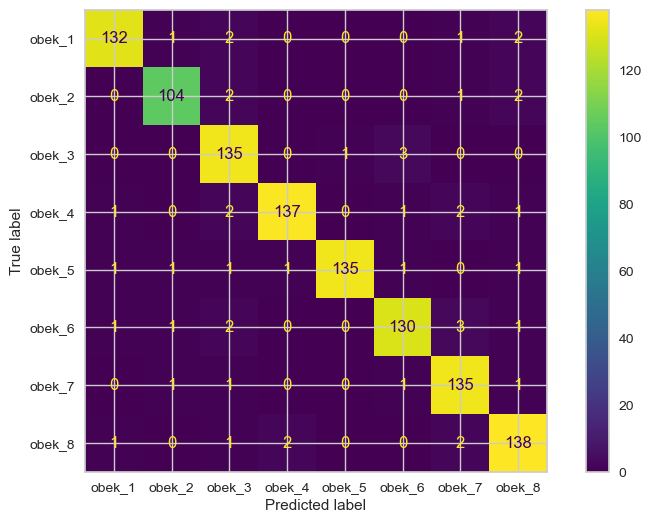




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

      obek_1       0.95      0.95      0.95       554
      obek_2       0.97      0.93      0.95       438
      obek_3       0.94      0.96      0.95       556
      obek_4       0.95      0.93      0.94       576
      obek_5       0.95      0.97      0.96       565
      obek_6       0.95      0.94      0.95       550
      obek_7       0.93      0.94      0.94       556
      obek_8       0.95      0.96      0.96       573

    accuracy                           0.95      4368
   macro avg       0.95      0.95      0.95      4368
weighted avg       0.95      0.95      0.95      4368



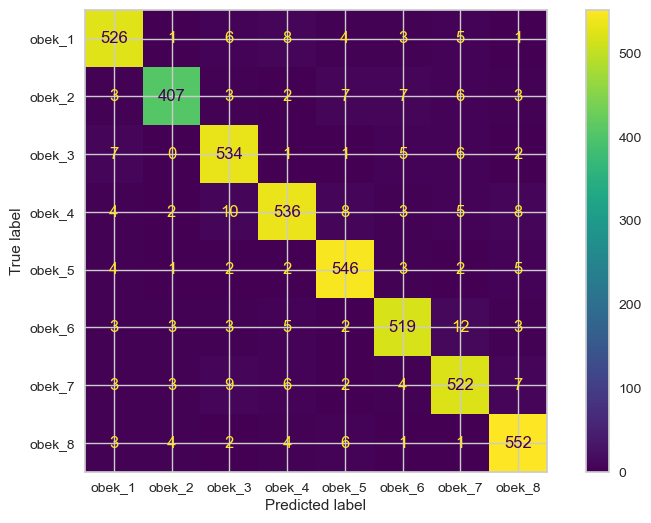

In [54]:
eval_metric_cat(model, X_train, y_train, X_test, y_test)

In [64]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='Accuracy',
    iterations=10000,
    random_seed=63,
    learning_rate=0.01,
    early_stopping_rounds=50,
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=100,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9400183	test: 0.9468864	best: 0.9468864 (0)	total: 57.9ms	remaining: 9m 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9597069597
bestIteration = 25

Shrink model to first 26 iterations.


TEST REPORT
              precision    recall  f1-score   support

      obek_1       0.97      0.95      0.96       138
      obek_2       0.96      0.95      0.96       109
      obek_3       0.92      0.97      0.95       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.99      0.95      0.97       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.94      0.97      0.96       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



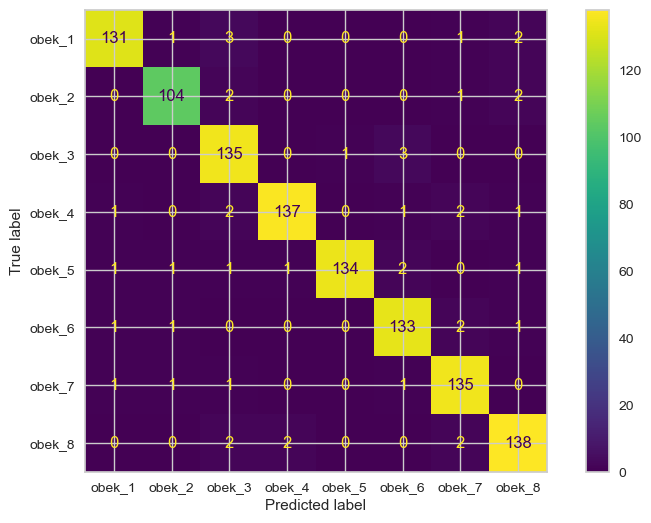




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

      obek_1       0.95      0.95      0.95       554
      obek_2       0.97      0.94      0.95       438
      obek_3       0.94      0.96      0.95       556
      obek_4       0.95      0.93      0.94       576
      obek_5       0.95      0.97      0.96       565
      obek_6       0.95      0.96      0.96       550
      obek_7       0.95      0.94      0.95       556
      obek_8       0.96      0.96      0.96       573

    accuracy                           0.95      4368
   macro avg       0.95      0.95      0.95      4368
weighted avg       0.95      0.95      0.95      4368



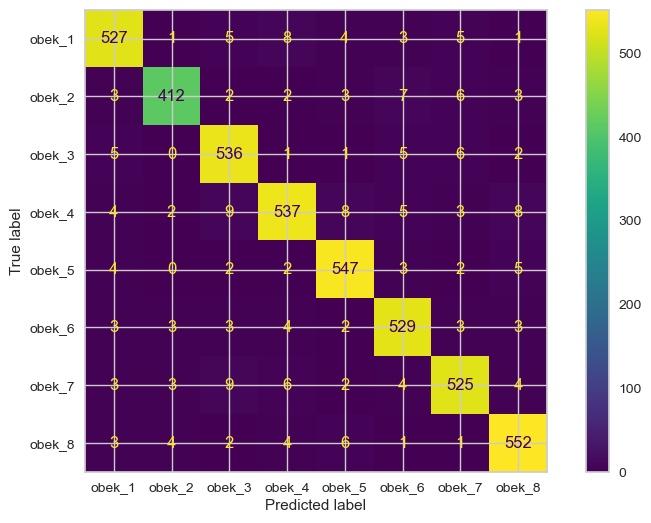

In [65]:
eval_metric_cat(model, X_train, y_train, X_test, y_test)

In [66]:
train_pool = catboost.Pool(X_train, y_train, cat_features=cat_features)
test_pool = catboost.Pool(X_test, cat_features=cat_features)

In [67]:
grid = {
    'learning_rate': [0.3 ,0.5, 0.7],
    'depth':[3, 4, 6],
    'l2_leaf_reg': [3],
    'bootstrap_type':['Bernoulli'],
}

grid_search_model = catboost.CatBoostClassifier(iterations=1000,
                                                random_seed=42,
                                                custom_loss = ['AUC', 'Recall', 'Precision', 'F1'])


grid_search_results = grid_search_model.grid_search(grid,
                                                    train_pool,
                                                    shuffle=False,
                                                    verbose=False,
                                                    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2947975	test: 1.3045770	best: 1.3045770 (0)	total: 17.3ms	remaining: 17.3s
1:	learn: 0.8479677	test: 0.8612604	best: 0.8612604 (1)	total: 36.5ms	remaining: 18.2s
2:	learn: 0.6584039	test: 0.6704541	best: 0.6704541 (2)	total: 56ms	remaining: 18.6s
3:	learn: 0.5350693	test: 0.5487450	best: 0.5487450 (3)	total: 71.2ms	remaining: 17.7s
4:	learn: 0.4743240	test: 0.4899656	best: 0.4899656 (4)	total: 88.7ms	remaining: 17.7s
5:	learn: 0.4164573	test: 0.4353262	best: 0.4353262 (5)	total: 107ms	remaining: 17.7s
6:	learn: 0.3811214	test: 0.4046509	best: 0.4046509 (6)	total: 123ms	remaining: 17.5s
7:	learn: 0.3629228	test: 0.3864099	best: 0.3864099 (7)	total: 140ms	remaining: 17.3s
8:	learn: 0.3456316	test: 0.3700306	best: 0.3700306 (8)	total: 156ms	remaining: 17.2s
9:	learn: 0.3265809	test: 0.3522448	best: 0.3522448 (9)	total: 173ms	remaining: 17.1s
10:	learn: 0.3169868	test: 0.3442191	best: 0.3442191 (10)	total: 189ms	remaining: 17s
11:	learn: 0.3117360	test: 0.3388077	best: 0.338807

In [68]:
grid_search_results['params']

{'depth': 4,
 'l2_leaf_reg': 3,
 'learning_rate': 0.3,
 'bootstrap_type': 'Bernoulli'}

In [69]:
grid_search_results['cv_results'].keys()

dict_keys(['iterations', 'test-MultiClass-mean', 'test-MultiClass-std', 'train-MultiClass-mean', 'train-MultiClass-std', 'test-AUC-mean', 'test-AUC-std', 'test-Recall-mean', 'test-Recall-std', 'train-Recall-mean', 'train-Recall-std', 'test-Precision-mean', 'test-Precision-std', 'train-Precision-mean', 'train-Precision-std', 'test-F1-mean', 'test-F1-std', 'train-F1-mean', 'train-F1-std'])

In [70]:
grid_search_results['cv_results']['test-Recall-mean'][-1]

nan

In [71]:
predicted = grid_search_model.predict_proba(test_pool)
predicted[:3]

array([[9.73482341e-01, 2.28600308e-03, 8.58059785e-03, 1.80205317e-04,
        1.19450139e-02, 2.15748749e-04, 8.89601397e-04, 2.42048918e-03],
       [9.76219416e-01, 5.96479153e-03, 4.08607371e-03, 4.82662360e-04,
        4.54436138e-03, 4.82152568e-04, 1.68421439e-03, 6.53632827e-03],
       [6.77539216e-04, 2.14607577e-04, 4.02922950e-04, 9.96518263e-01,
        7.99398017e-05, 1.61780238e-03, 2.70495078e-04, 2.18430484e-04]])

In [75]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=42,
    depth=4,
    iterations=1000,
    l2_leaf_reg=3,
    learning_rate=0.3,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    early_stopping_rounds=15,
    custom_loss = ['Accuracy', 'Recall', 'Precision', 'F1']
)
fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=100,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1455456	total: 22ms	remaining: 22s
100:	learn: 0.2734442	total: 2.52s	remaining: 22.4s
200:	learn: 0.2393996	total: 5.07s	remaining: 20.2s
300:	learn: 0.2004734	total: 8.24s	remaining: 19.1s
400:	learn: 0.1655454	total: 11.1s	remaining: 16.6s
500:	learn: 0.1344130	total: 13.9s	remaining: 13.9s
600:	learn: 0.1091770	total: 16.7s	remaining: 11.1s
700:	learn: 0.0882420	total: 19.7s	remaining: 8.39s
800:	learn: 0.0725054	total: 22.4s	remaining: 5.57s
900:	learn: 0.0608553	total: 25.4s	remaining: 2.79s
999:	learn: 0.0508836	total: 28.2s	remaining: 0us


TEST REPORT
              precision    recall  f1-score   support

      obek_1       0.97      0.96      0.96       138
      obek_2       0.96      0.95      0.96       109
      obek_3       0.93      0.97      0.95       139
      obek_4       0.98      0.95      0.96       144
      obek_5       0.99      0.95      0.97       141
      obek_6       0.95      0.96      0.96       138
      obek_7       0.94      0.97      0.96       139
      obek_8       0.95      0.96      0.96       144

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



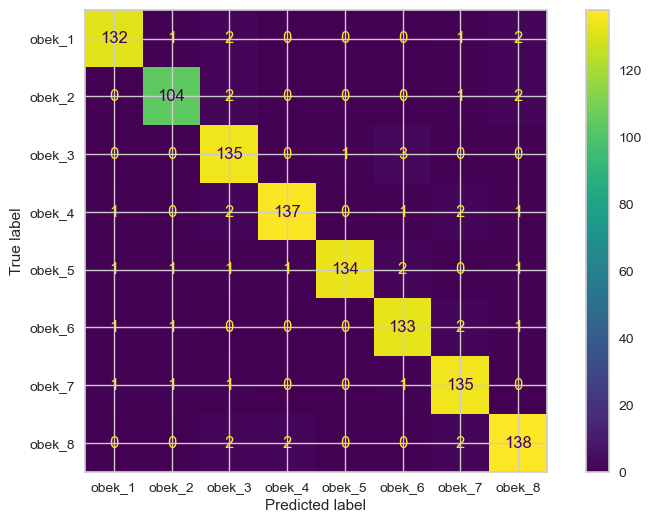




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

      obek_1       0.97      0.95      0.96       554
      obek_2       0.97      0.95      0.96       438
      obek_3       0.94      0.97      0.95       556
      obek_4       0.95      0.94      0.95       576
      obek_5       0.96      0.97      0.96       565
      obek_6       0.96      0.96      0.96       550
      obek_7       0.96      0.95      0.95       556
      obek_8       0.96      0.97      0.96       573

    accuracy                           0.96      4368
   macro avg       0.96      0.96      0.96      4368
weighted avg       0.96      0.96      0.96      4368



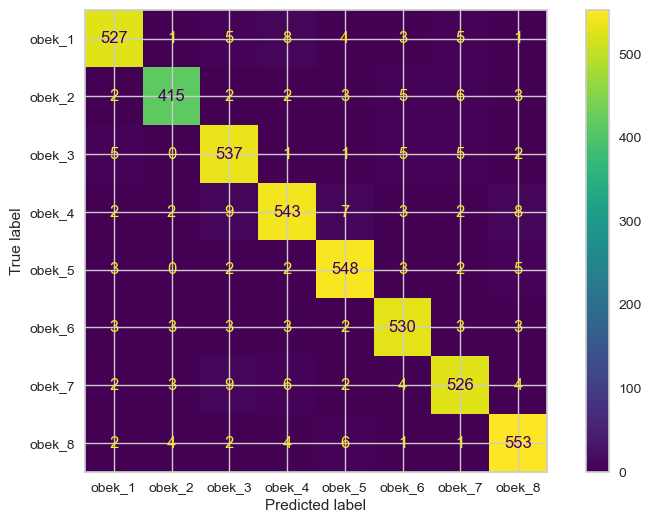

In [73]:
eval_metric_cat(fast_model, X_train, y_train, X_test, y_test)

In [ ]:
predict = xgb_grid_model.predict(test)

In [67]:
predict

array([2, 2, 1, ..., 6, 4, 5], dtype=int64)

In [68]:
data = {
    'id': range(2340),
    'Öbek İsmi': predict
}
sub_df = pd.DataFrame(data)
sub_df.set_index('id', inplace=True)
sub_df

,Öbek İsmi
id,
0,2
1,2
2,1
3,5
4,0
...,...
2335,7
2336,1
2337,6


In [69]:
sub_df['Öbek İsmi'] = sub_df['Öbek İsmi'].map({0: 'obek_1', 1:'obek_2', 2:'obek_3', 3:'obek_4', 4:'obek_5', 5:'obek_6', 6:'obek_7', 7:'obek_8'})

In [70]:
sub_df

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7


In [71]:
sub_df.to_csv('submission.csv')